# TWİTTER DATA SENTİMENT ANALYSİS

### Twitter verisi çekip yada mevcut tweets datasından verilere "Sentiment Analizi" yapacağız. Classification modeli uygulayıp, en çok kullanılan sözcüklerin "WordCloud" unu oluşturacağız.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

###### TWİTTERDAN VERİ ÇEKİMİ

##### VERİ ÇEKİMİ KISITLANDIĞI İÇİN MEVCUT TWEET DATASINI OKUMA

In [12]:
tw1=pd.read_csv("twitter_data.csv")

In [13]:
tw1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
tw1.shape

(24783, 7)

In [15]:
tw1.tweet[1]

'!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!'

In [6]:
tw2=pd.read_csv("ChatGPT_Tweets.csv")

In [7]:
tw2.head()

,Unnamed: 0,tweet_id,original_text,sentiment,tasks,users,technologies,organizations,job_competencies,job_profiles,nouns,verbs,adjectives,subjects,objects,predicates,topic
0,0,1597847994526842880,[GPT-3] This post discusses the need for an au...,neutral,ensure safety,NaN,artificial intelligence,"GPT3, Artificial Intelligence AI, AI",logic,NaN,"gpt3, post, need, audit, system, intelligence,...","discusses, ensure, suggests, focus, creating",artificial,"this post, it, the development of ai",the need for an audit system for artificial in...,discusses,"gpt4, ai, gpt3, deeplearning gpt, ai gpt, will..."
1,1,1597847639823118336,@soniajoseph_ Gpt = black box = fancy statitis...,neutral,NaN,NaN,NaN,Gpt,NaN,NaN,"box, fancy, statitistics",NaN,"username, gpt, black",NaN,NaN,statitistics,"gpt, ask gpt, gpt gpt, lol, use gpt, using gpt"
2,2,1597846446765936640,"Today, I'm working on building my own AI writi...",neutral,NaN,NaN,api,"AI, GPT3 Heres",plan,secretary,"today, ai, w, gpt3, plan, playground, connect,...","im, working, building, writing, heres, explore...","own, assistant, openai, api, cool","i, assistant w gpt3, the plan, this, you","my own, openai playground connect, api ship, a...",working,"chatgpt, ai, will"
3,3,1597845565056126976,"Ars Technica: OpenAI upgrades GPT-3, stunning ...",positive,NaN,NaN,NaN,GPT3,NaN,NaN,"ars, upgrades, poetry, lyrics, username","technica, gpt3, stunning, rhyming",openai,NaN,"rhyming poetry and lyrics, username",stunning,"chatgpt, ai, will"
4,4,1597845515991142400,@RandomSprint @goth600 @jeremymstamper @heyors...,negative,NaN,guy,NaN,GPT3,NaN,NaN,"type, guy, gpt3, stop, nobody, hes","talks, believes","username, cant, real","who, nobody, he","guy, gpt3",type,"chatgpt, ai, will"


In [8]:
tw2.shape

(3821843, 17)

In [11]:
tw2.original_text[0]

'[GPT-3] This post discusses the need for an audit system for Artificial Intelligence (AI) to ensure safety and cooperation. It suggests that the development of AI should focus on creating a system of logic and cooperatio [...] https://t.co/iRNQQH8UjX'

# NLP Projesi

In [16]:
#1-küçük harfe çevireceğiz
tw1["tweet"]=tw1["tweet"].str.lower()

In [17]:
#2-noktalama işaretlerini kaldıracağız
tw1['tweet']=tw1['tweet'].str.replace('[^\w\s]','')

In [18]:
tw1['tweet']=tw1['tweet'].str.replace('\n','')

In [19]:
#3-rakamları kaldır
tw2['tweet']=tw1['tweet'].str.replace('\d+','')

In [20]:
#4-satır başlarını kaldır
tw1['tweet']=tw1['tweet'].str.replace('\r','')

In [21]:
tw1['tweet'].replace({'r"[\s]+"':''},regex=True,inplace=True)
#Gereksiz boşlukları(whitespaces) kaldırdık

In [22]:
from unicodedata import normalize
tw1['tweet']=tw1['tweet'].apply(lambda text: normalize("NFKD", str(text)).encode("ascii", "ignore").decode("utf-8", "ignore"))
#Aksanları ortadan kaldırdık

In [23]:
# Lang Detect
from langdetect import detect
tw1['language']=tw1['tweet'].apply(detect)
tw1=tw1[tw1['language']=='en']
tw1

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,language
0,0,3,0,0,3,2,rt mayasolovely as a woman you shouldnt compl...,en
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad for cuff...,en
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life you eve...,en
3,3,3,0,2,1,1,rt c_g_anderson viva_based she look like a tr...,en
4,4,6,0,6,0,1,rt shenikaroberts the shit you hear about me ...,en
...,...,...,...,...,...,...,...,...
24777,25290,3,2,1,0,0,youre such a retard i hope you get type 2 diab...,en
24778,25291,3,0,2,1,1,yous a muthafin lie 8220lifeasking 20_pearls c...,en
24779,25292,3,0,1,2,2,youve gone and broke the wrong heart baby and ...,en
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,en


In [24]:
# 5-Gereksiz kelimeleri çıkart (Stopwords)
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
tw1['tweet']=tw1['tweet'].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))
#Gereksiz kelimeleri kaldırdık

In [26]:
# 6-Tokenize et
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
tw1['tokenized']=[tokenizer.tokenize(i) for i in tw1['tweet'].values]

In [27]:
# 7-Ekleri kaldır, kökleri bul (Lemma&Stemma)
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
tw1['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in tw1['tweet'].values]

In [33]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [34]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [28]:
# Polarity / Subjectivity
from textblob import TextBlob
tw1[['polarity','subjectivity']]=tw1['tweet'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [29]:
tw1.sample(9)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,language,tokenized,lemmatize,polarity,subjectivity
14427,14770,3,0,0,3,2,rt blisstabitha homeowner shoots armed suspect...,en,"[rt, blisstabitha, homeowner, shoots, armed, s...","[r, t, , b, l, i, s, s, t, a, b, i, t, h, a, ...",0.000000,0.000000
2386,2435,3,1,2,0,1,alanmilner morning_joe alqueda doesnt use cell...,en,"[alanmilner, morning_joe, alqueda, doesnt, use...","[a, l, a, n, m, i, l, n, e, r, , m, o, r, n, ...",-0.350000,1.000000
4542,4675,6,0,6,0,1,righteouz_ growejr could chick boobs face scor...,en,"[righteouz_, growejr, could, chick, boobs, fac...","[r, i, g, h, t, e, o, u, z, _, , g, r, o, w, ...",0.500000,0.500000
19999,20441,3,0,1,2,2,rt shakiraevanss criticize amanda saying n wor...,en,"[rt, shakiraevanss, criticize, amanda, saying,...","[r, t, , s, h, a, k, i, r, a, e, v, a, n, s, ...",0.500000,0.861111
17961,18364,3,0,3,0,1,rt vivaronron pussy must pop severely 8220yada...,en,"[rt, vivaronron, pussy, must, pop, severely, 8...","[r, t, , v, i, v, a, r, o, n, r, o, n, , p, ...",-0.071429,0.214286
3191,3273,3,3,0,0,0,frankiejgrande fugly queer white trash,en,"[frankiejgrande, fugly, queer, white, trash]","[f, r, a, n, k, i, e, j, g, r, a, n, d, e, , ...",0.000000,0.000000
292,296,3,0,3,0,1,_tommycollins wearerichnow buffalobills yeah t...,en,"[_tommycollins, wearerichnow, buffalobills, ye...","[_, t, o, m, m, y, c, o, l, l, i, n, s, , w, ...",-0.341667,0.833333
7638,7854,3,0,3,0,1,fuckin dudes bitch refsshut fuck play,en,"[fuckin, dudes, bitch, refsshut, fuck, play]","[f, u, c, k, i, n, , d, u, d, e, s, , b, i, ...",-0.400000,0.600000
14004,14344,3,0,0,3,2,rt 1goodlookingman bees mets yankees lost good...,en,"[rt, 1goodlookingman, bees, mets, yankees, los...","[r, t, , 1, g, o, o, d, l, o, o, k, i, n, g, ...",0.700000,0.600000


In [30]:
# yukarıda çıkan sonuçları tek rakama dönüştürelim
tw1.loc[tw1['subjectivity']>0.5,'sentiment']=1 #pozitive
tw1.loc[tw1['subjectivity']==0.5,'sentiment']=0 #neutral
tw1.loc[tw1['subjectivity']<0.5,'sentiment']=-1 #negative
tw1

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,language,tokenized,lemmatize,polarity,subjectivity,sentiment
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain clean...,en,"[rt, mayasolovely, woman, shouldnt, complain, ...","[ , r, t, , m, a, y, a, s, o, l, o, v, e, l, ...",0.000000,0.000000,-1.0
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin d...,en,"[rt, mleew17, boy, dats, coldtyga, dwn, bad, c...","[ , r, t, , m, l, e, e, w, 1, 7, , b, o, y, ...",-0.700000,0.666667,1.0
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fu...,en,"[rt, urkindofbrand, dawg, rt, 80sbaby4life, ev...","[ , r, t, , u, r, k, i, n, d, o, f, b, r, a, ...",-0.333333,0.700000,1.0
3,3,3,0,2,1,1,rt c_g_anderson viva_based look like tranny,en,"[rt, c_g_anderson, viva_based, look, like, tra...","[ , r, t, , c, _, g, _, a, n, d, e, r, s, o, ...",0.000000,0.000000,-1.0
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might ...,en,"[rt, shenikaroberts, shit, hear, might, true, ...","[ , r, t, , s, h, e, n, i, k, a, r, o, b, e, ...",0.075000,0.725000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24777,25290,3,2,1,0,0,youre retard hope get type 2 diabetes die suga...,en,"[youre, retard, hope, get, type, 2, diabetes, ...","[y, o, u, r, e, , r, e, t, a, r, d, , h, o, ...",-0.750000,0.900000,1.0
24778,25291,3,0,2,1,1,yous muthafin lie 8220lifeasking 20_pearls cor...,en,"[yous, muthafin, lie, 8220lifeasking, 20_pearl...","[y, o, u, s, , m, u, t, h, a, f, i, n, , l, ...",0.285714,0.535714,1.0
24779,25292,3,0,1,2,2,youve gone broke wrong heart baby drove rednec...,en,"[youve, gone, broke, wrong, heart, baby, drove...","[y, o, u, v, e, , g, o, n, e, , b, r, o, k, ...",-0.550000,0.900000,1.0
24781,25295,6,0,6,0,1,youu got wild bitches tellin lies,en,"[youu, got, wild, bitches, tellin, lies]","[y, o, u, u, , g, o, t, , w, i, l, d, , b, ...",0.100000,0.400000,-1.0


In [32]:
#icmali hali
tw1.sentiment.value_counts()

-1.0    12749
 1.0     8977
 0.0      995
Name: sentiment, dtype: int64

##### Data Visualization

In [39]:
import seaborn as sns

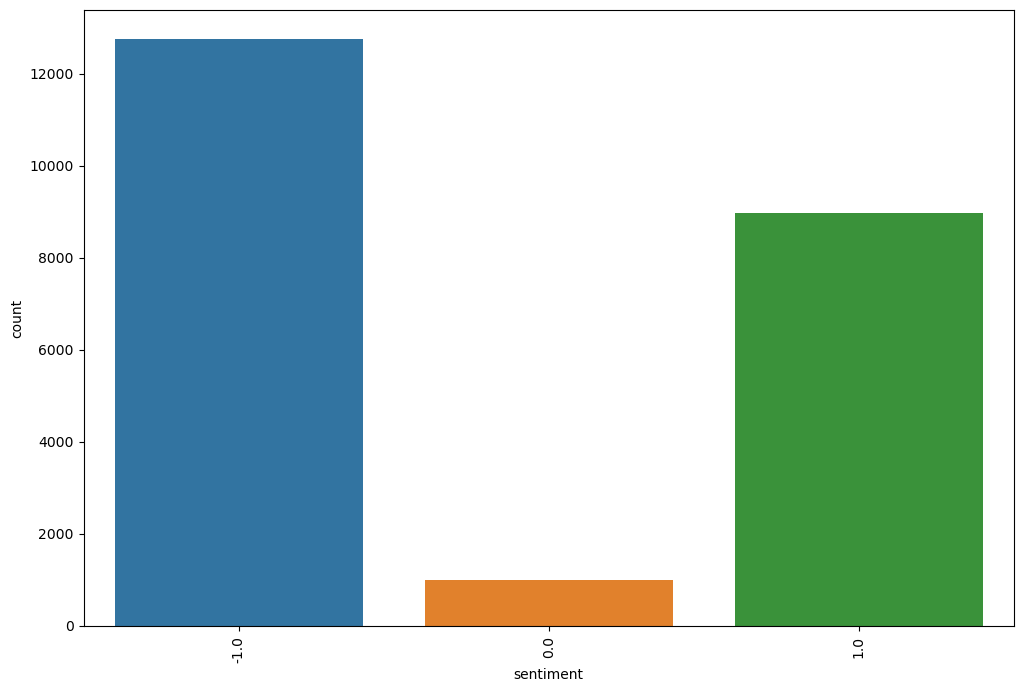

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(x=tw1["sentiment"])
plt.xticks(rotation=90);

In [45]:
# 8-Vektörize et
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

##### Klasik Classification modelleme

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [46]:
x=tw1.tweet
y=tw1.sentiment

In [47]:
x=vect.fit_transform(x)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [49]:
l=LogisticRegression()
d=DecisionTreeClassifier()

In [50]:
l.fit(x_train,y_train)

LogisticRegression()

In [51]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
pred=l.predict(x_test)

In [53]:
accuracy_score(pred,y_test)

0.8905837488999707

In [55]:
pred1=d.predict(x_test)

In [56]:
accuracy_score(pred1,y_test)

0.8715165737753007

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
mb=MultinomialNB()

In [59]:
mb.fit(x_train,y_train)

MultinomialNB()

In [60]:
pred2=mb.predict(x_test)

In [61]:
accuracy_score(pred2,y_test)

0.8198885303608097

#### Pycaret ile Classification Modellemeye başlıyoruz...

In [41]:
from pycaret.classification import*

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
tw11=tw1[['sentiment','tweet']]

In [ ]:
exp_name=setup(data=tw11,target='sentiment')

In [ ]:
best_model=compare_models()

### WordCloud

In [63]:
import os
from PIL import Image
from wordcloud import WordCloud,STOPWORDS

In [72]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    


In [75]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords)
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [79]:
pozitif_tw=tw1[tw1["subjectivity"]>0.5]["tweet"]
negatif_tw=tw1[tw1["subjectivity"]<0.5]["tweet"]
nötr_tw=tw1[tw1["subjectivity"]==0.5]["text"]

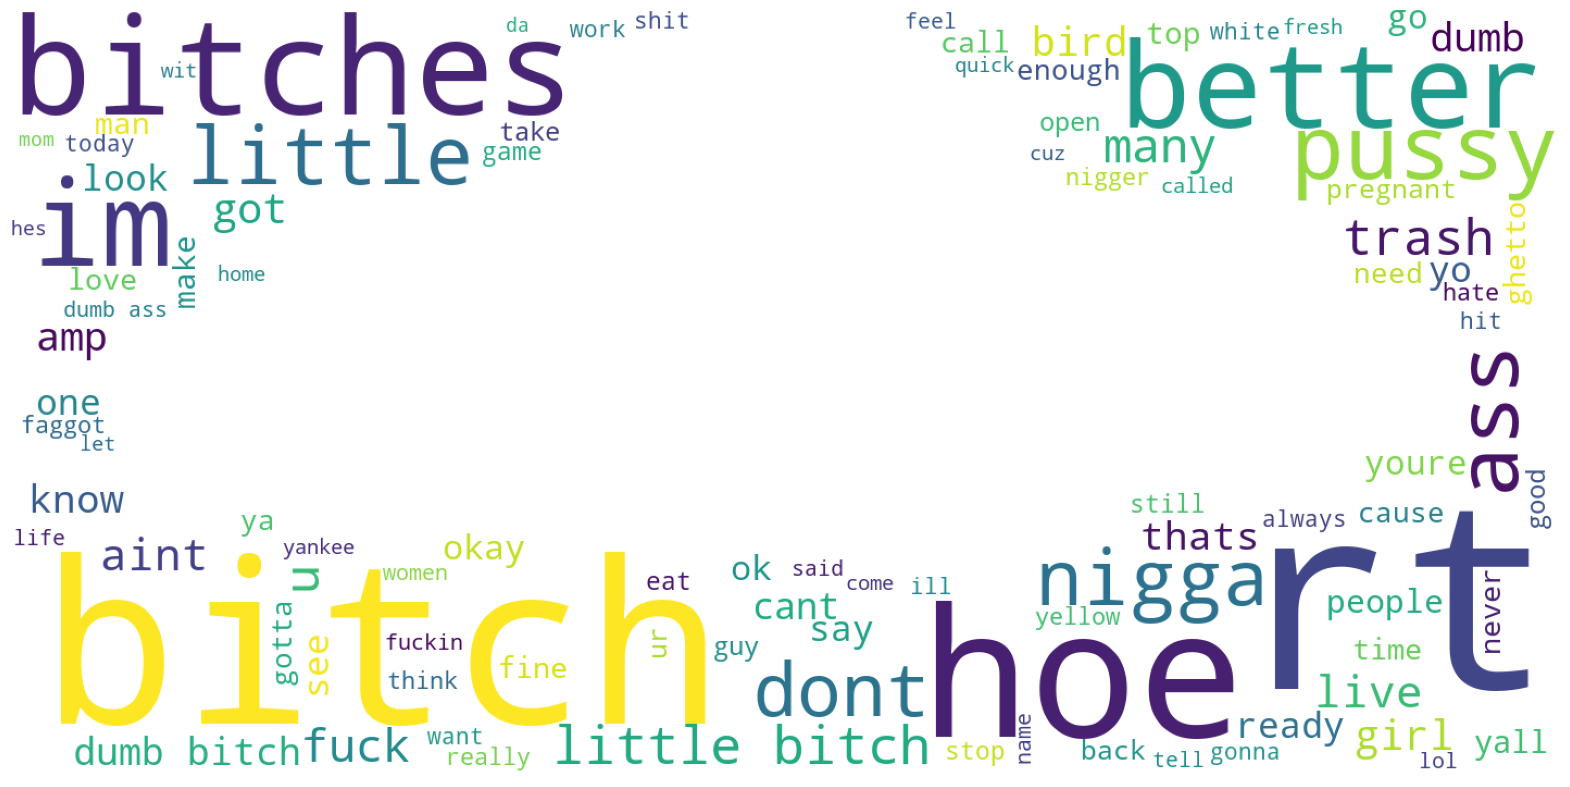

In [81]:
wc(nötr_tw,"white")